# 결정 트리 (Decision Tree) - 분류  
- 스무고개처럼 질문/결정을 통해 데이터를 분류하는 모델
    - 데이터 스케일링 영향이 적음
    - 선형 구조가 아닌 복잡한 구조의 데이터에 적합
    - 과대적합 되기 쉬움 -> 가지치기 등을 통해 과대적합 방지

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

graphviz 설치

- 그래프 시각화를 위한 오픈소스 소프트웨어 도구

1. os에 설치
2. pytho wrapper package 설치
3. plot_tree 사용

In [2]:
!pip install graphviz

### Wine 이진 분류
- 와인 품질 데이터셋을 가공한 레드/화이트 와인 이진분류 데이터셋
    - 0: 레드 와인
    - 1: 화이트 와인

In [3]:
# 데이터 로드
wine_df= pd.read_csv('./data/wine_simple.csv')
wine_df

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [6]:
# 데이터 분리 및 스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = wine_df.drop('class', axis=1)
y = wine_df['class']
y.value_counts()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# 모델 학습 및 평가
from sklearn.tree import DecisionTreeClassifier

# dt_clf = DecisionTreeClassifier()
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.8499589490968801, 0.8363076923076923)

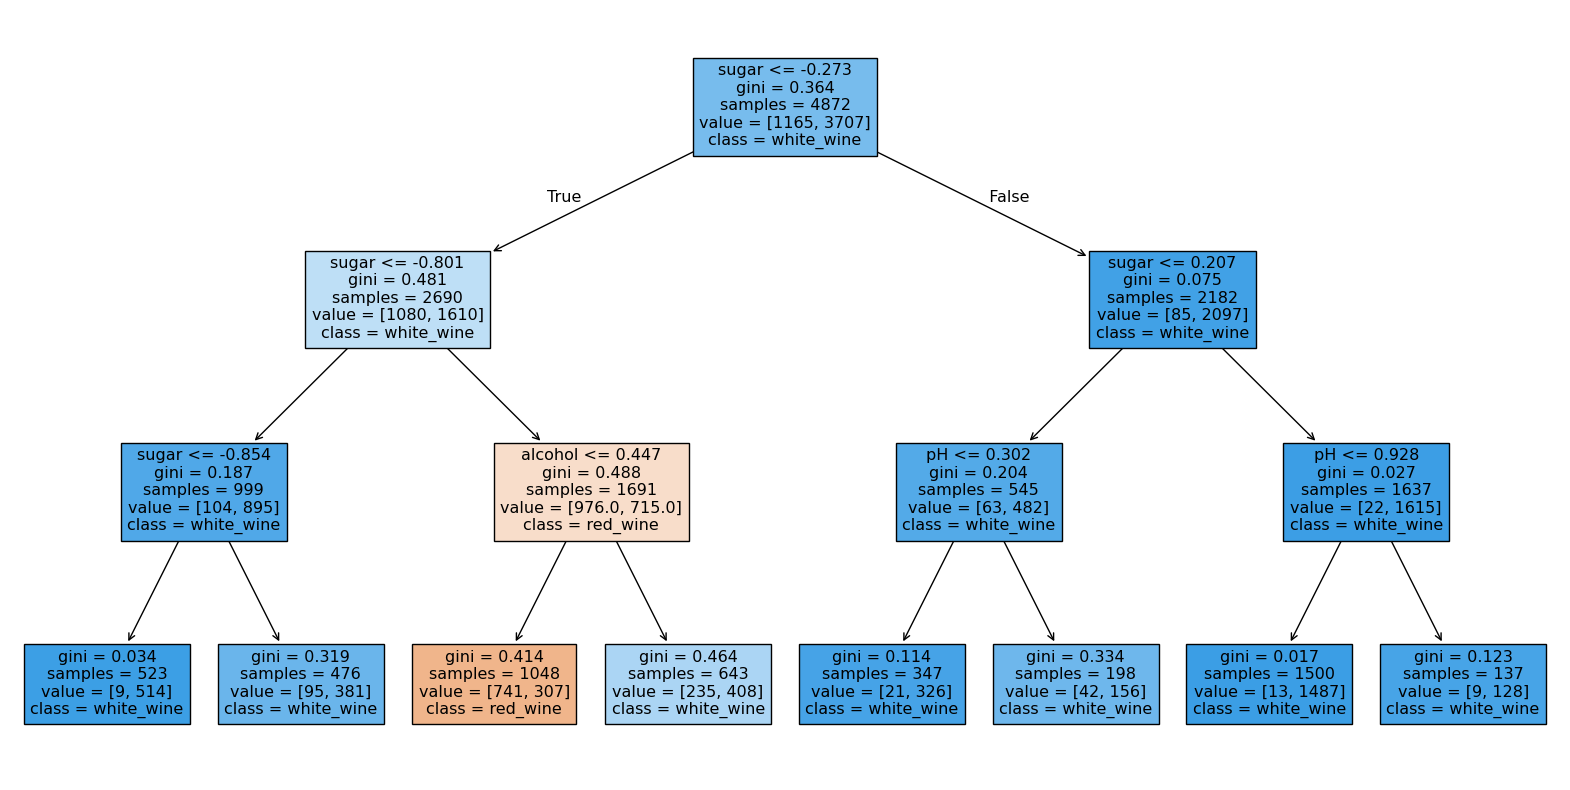

In [12]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf, 
    filled=True,
    feature_names=X.columns,
    class_names=['red_wine', 'white_wine']
    )
plt.show()

### iris 다중분류

In [15]:
# 데이터 로드 및 분리
from sklearn.datasets import load_iris

iris_data = load_iris() # data : x 데이터, target : y 데이터

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=0)


In [16]:
# 모델 학습 및 평가
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)

dt_clf.fit(X_train, y_train)
dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)


(0.9821428571428571, 0.9736842105263158)

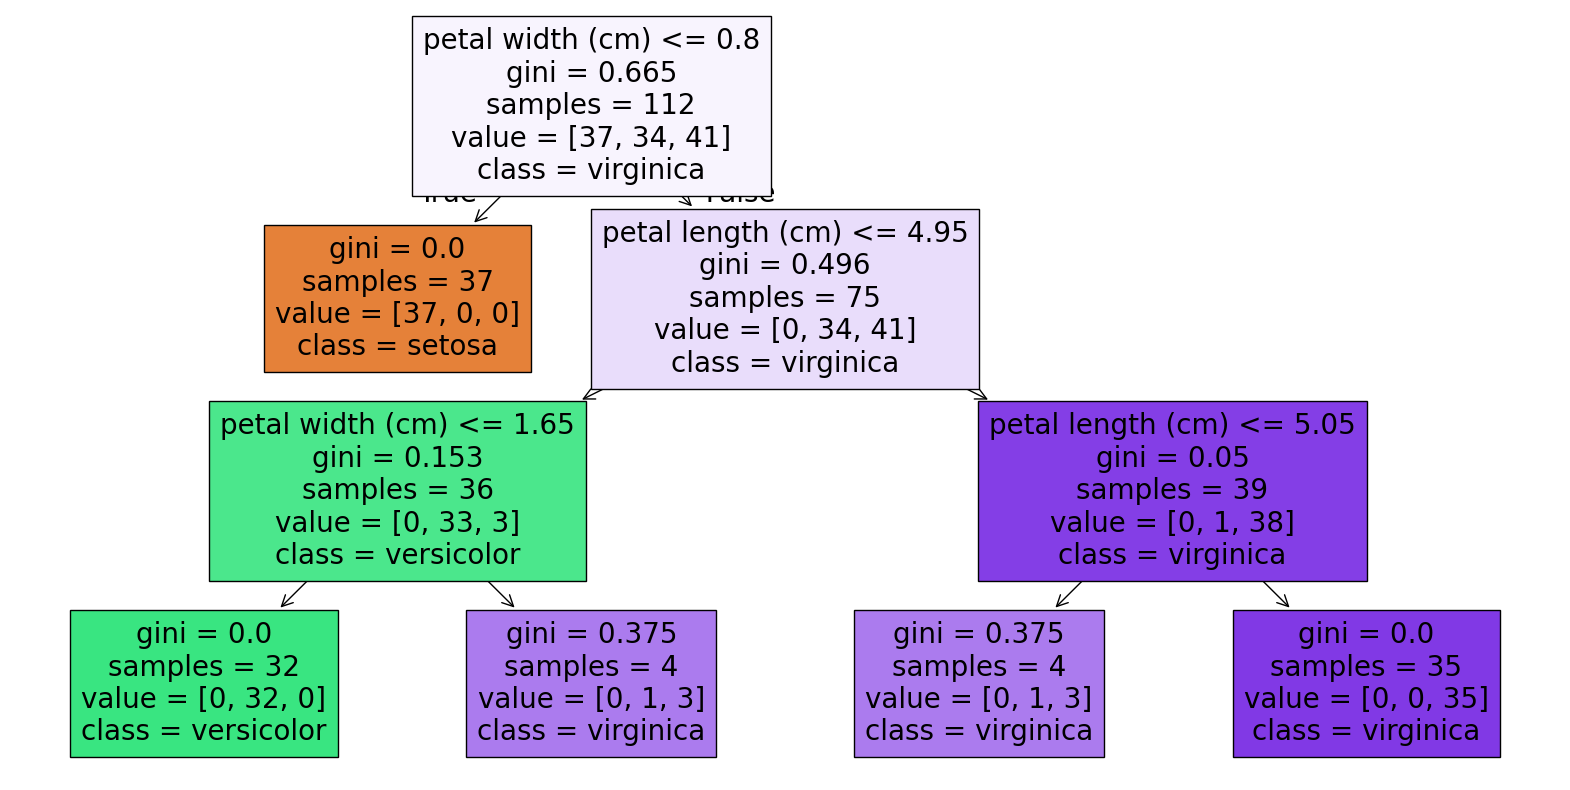

In [17]:
# 트리모델 시각화
plt.figure(figsize=(20, 10))

plot_tree(
    dt_clf,
    filled=True,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names
)
plt.show()

# DecisionTreeRegressor 회귀

- 각 노드에서 MSE를 최소화하는 방향으로 노드 분할
- 최종 노드(리프 노드)에서는 각 샘플들이 평균값을 계산해 예측값으로 사용

In [22]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
housing_df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
housing_df[housing_data.target_names[0]] = housing_data.target
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [24]:
# 데이터 준비 (분리)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing_data.data, housing_data.target, random_state=0)

In [26]:
# 모델 훈련 및 평가
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_reg = DecisionTreeRegressor(random_state=0)

# 학습
dt_reg.fit(X_train, y_train)
dt_reg.score(X_train, y_train), dt_reg.score(X_test, y_test)

# 예측
pred_train = dt_reg.predict(X_train)
pred_test = dt_reg.predict(X_test)

# 평가 
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print("train 데이터 평가: ", mse_train, '|', r2_train)
print("test 데이터 평가: ", mse_test, '|', r2_test)

train 데이터 평가:  8.051681073961231e-32 | 1.0
test 데이터 평가:  0.5501739317092635 | 0.5837851046291411


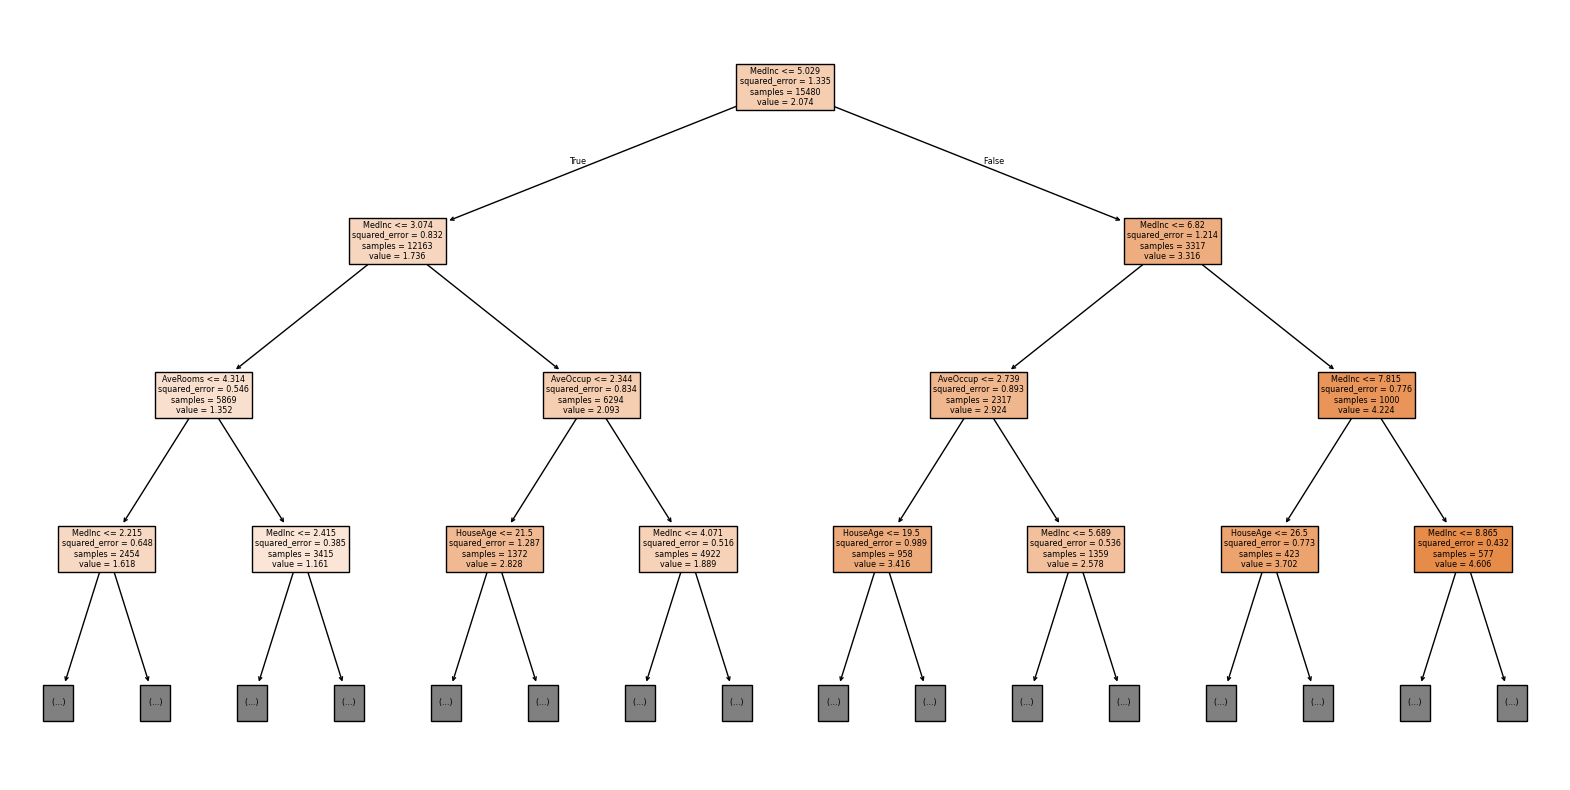

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_reg,
    filled=True,
    feature_names=housing_data.feature_names,
    max_depth=3
)
plt.show()

<Axes: >

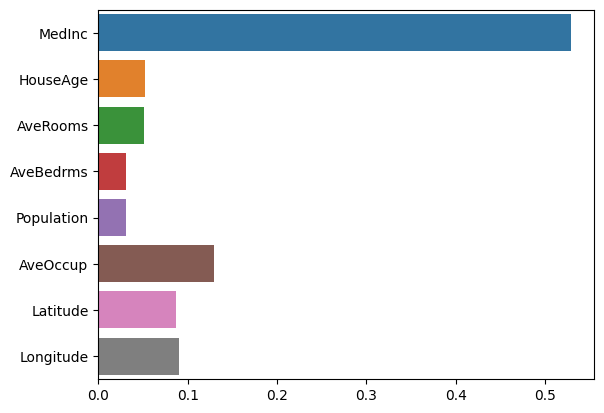

In [32]:
# 특성 중요도

dt_reg.feature_importances_

sns.barplot(x=dt_reg.feature_importances_, y=housing_data.feature_names, hue=housing_data.feature_names)